In [1]:
import numpy as np
import matplotlib.pyplot as plt

from typing import List

In [4]:
class CurveFitting:
  def __init__(self, xs, ys : List[int]) -> None:

    # Given data
    self.xs = np.array(xs)
    self.ys = np.array(ys)

  def calc_coeff(self, order) -> np.ndarray:
    # Perform regression using polyfit,
    mC = np.polyfit(self.xs, self.ys, deg=order)

    # Display
    coeff_text = {
      1: '(a, b)', 2: '(a, b, c)', 3: '(a, b, c, d)'}
    order_text = {
      1: 'Linear',  2: 'Quadratic ', 3: 'Cubic'}

    print(f'Using polyfit : {order_text[order]}')
    print(f'Coefficients  : {coeff_text[order]}:'
      + f'\n\t{np.flip(mC)}\n')

    # Get coefficient matrix
    return np.flip(mC)

  def calc_plot_all(self) -> None:
    self.x_plot = xp = np.linspace(
      min(self.xs), max(self.xs), 100)

    # Calculate coefficients directly
    mCoeff_1st = self.calc_coeff(1)
    mCoeff_2nd = self.calc_coeff(2)
    mCoeff_3rd = self.calc_coeff(3)

    [a1, b1] = mCoeff_1st
    self.y1_plot = a1 + b1 * xp

    [a2, b2, c2] = mCoeff_2nd
    self.y2_plot = a2 + b2 * xp + c2 * xp ** 2

    [a3, b3, c3, d3] = mCoeff_3rd
    self.y3_plot = a3 + b3 * xp + c3 * xp ** 2 + d3 * xp ** 3

  def draw_plot(self) -> None:
    plt.scatter(self.xs, self.ys, color='teal',
      label='Data points', )
    plt.plot(self.x_plot, self.y1_plot, color='red',
      label='Linear Equation')
    plt.plot(self.x_plot, self.y2_plot, color='green',
      label='Fitted second-order polynomial')
    plt.plot(self.x_plot, self.y3_plot, color='blue',
      label='Fitted third-order polynomial')

    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Polynomial Curve Fitting')

    plt.show()

  def process(self) -> None:
    self.calc_plot_all()
    self.draw_plot()

Using polyfit : Linear
Coefficients  : (a, b):
	[-721.  306.]

Using polyfit : Quadratic 
Coefficients  : (a, b, c):
	[ 137. -162.   39.]

Using polyfit : Cubic
Coefficients  : (a, b, c, d):
	[5. 4. 3. 2.]



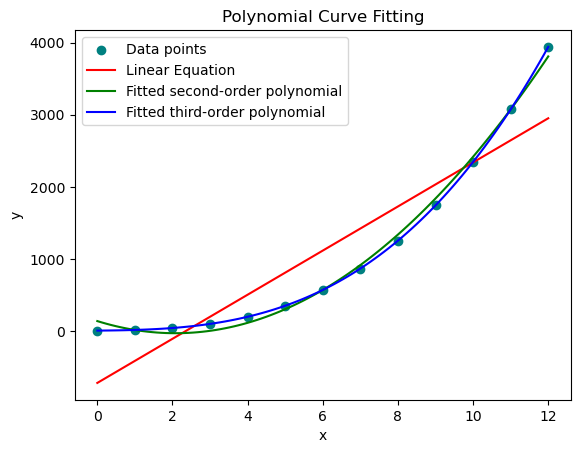

In [6]:
def main() -> int:
  # Getting Matrix Values
  mCSV = np.genfromtxt("series.csv",
    skip_header=1, delimiter=",", dtype=float)
  mCSVt   = np.transpose(mCSV)

  example = CurveFitting(mCSVt[0], mCSVt[3])
  example.process()
  
if __name__ == "__main__":
  main()